<a href="https://colab.research.google.com/github/HaiderAliSaeed/CE888_Lab/blob/main/All%20Labs/Lab_6/Task%201-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/WindeData.csv")
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


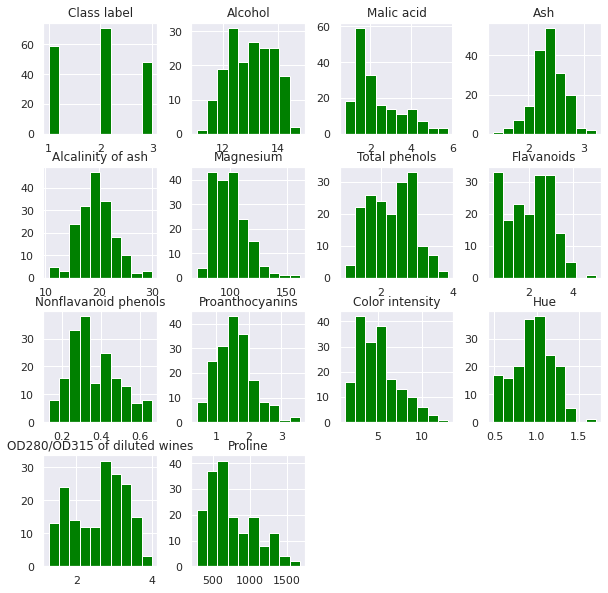

In [ ]:
#Task 1: Check the counts of each wine class
sns.set()
df.hist(figsize=(10,10), color='green')
plt.show()

In [ ]:
#Cluster wine data using K Means Algorithm


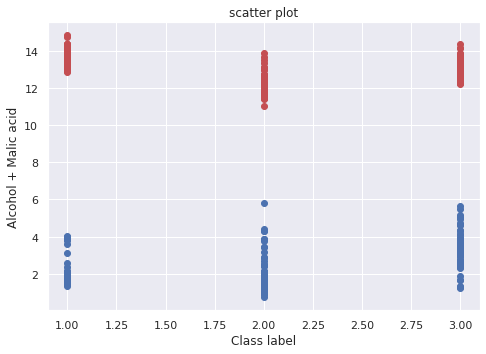

In [ ]:
#Task 3: Scatter plot wine data into 3 classes based on True Labels and plot with legends. Hint: use any two variables
import matplotlib.pyplot as plt
x = df['Class label'].values
y = df['Alcohol'].values
z = df['Malic acid'].values
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y, color='r')
ax.scatter(x, z, color='b')
ax.set_xlabel('Class label')
ax.set_ylabel('Alcohol + Malic acid')
ax.set_title('scatter plot')
plt.show()


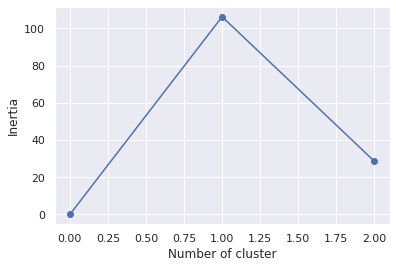

In [ ]:
from sklearn.cluster import KMeans
inertia=np.empty(3)
for i in range(1,3):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df['Class label'].values.reshape(-1,1))
    inertia[i] = kmeans.inertia_

plt.plot(range(0,3),inertia,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Task 4: Use cluster model labels to group data based on predicted classes
kmeans1 = KMeans(n_clusters=3, random_state=0)
clusters = kmeans1.fit_predict(df['Class label'].values.reshape(-1,1))
df["cluster"] = clusters
df.tail()


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,2
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,2


In [ ]:
#Task 5: Apply PCA with n_components=2 on X_train_std wine data and transform test data accordingly
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
pca_wine = scikit_pca.fit_transform(df)

                              Class label   Alcohol  ...   Proline   cluster
Class label                      1.000000 -0.328222  ... -0.633717  1.000000
Alcohol                         -0.328222  1.000000  ...  0.643720 -0.328222
Malic acid                       0.437776  0.094397  ... -0.192011  0.437776
Ash                             -0.049643  0.211545  ...  0.223626 -0.049643
Alcalinity of ash                0.517859 -0.310235  ... -0.440597  0.517859
Magnesium                       -0.209179  0.270798  ...  0.393351 -0.209179
Total phenols                   -0.719163  0.289101  ...  0.498115 -0.719163
Flavanoids                      -0.847498  0.236815  ...  0.494193 -0.847498
Nonflavanoid phenols             0.489109 -0.155929  ... -0.311385  0.489109
Proanthocyanins                 -0.499130  0.136698  ...  0.330417 -0.499130
Color intensity                  0.265668  0.546364  ...  0.316100  0.265668
Hue                             -0.617369 -0.071747  ...  0.236183 -0.617369

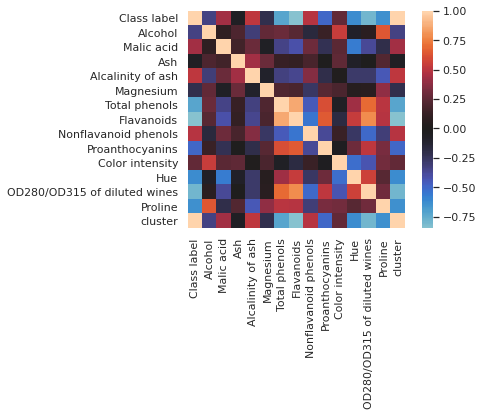

In [ ]:
# Compute the correlation matrix before doing PCA
nm=pd.DataFrame(df)
pca_corr=nm.corr()
print(pca_corr)
sns.heatmap(pca_corr, vmax=1, center=0, square=True)
plt.savefig('CORR_PCA.png', dpi=300)

              0             1
0  1.000000e+00 -2.183214e-17
1 -2.183214e-17  1.000000e+00


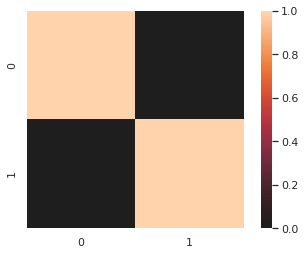

In [ ]:
# Compute the correlation matrix after doing PCA
nmp=pd.DataFrame(pca_wine)
corr_pca=nmp.corr()
print(corr_pca)
sns.heatmap(corr_pca, vmax=1, center=0, square=True)
plt.savefig('PCA_CORR.png', dpi=300)

**Task 6: Apply Logistic Regression on training features and predict test** 

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)
df1 =  pd.read_csv('/content/WindeData.csv')

x = df1[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']]
y = df1['Class label'].values

In [ ]:
df1.columns

Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [ ]:
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [ ]:
model.classes_

array([1, 2, 3])

In [ ]:
model.intercept_

array([-0.33467517,  0.44794933, -0.09311969])

In [ ]:
model.coef_

array([[-5.31780311e-01,  7.63705463e-01,  1.08649095e+00,
        -6.30476727e-01, -2.41694015e-02,  1.16879106e-01,
         1.37200938e+00,  9.36909812e-02, -4.44237562e-01,
        -1.13546247e-01, -1.68886178e-01,  8.50294179e-01,
         1.58989477e-02],
       [ 8.97661826e-01, -1.16062972e+00, -8.44310687e-01,
         2.53133297e-01,  5.54552611e-03,  2.39606108e-01,
         5.81043924e-01,  4.22011512e-01,  6.99972580e-01,
        -1.84067341e+00,  9.08296966e-01,  2.00644415e-02,
        -1.32198603e-02],
       [-3.43764640e-01,  6.48209396e-01,  1.04708773e-01,
         1.34060233e-01,  1.88589560e-02, -6.30947483e-01,
        -1.92530844e+00, -1.54006229e-01, -7.33899495e-01,
         1.08310119e+00, -5.56492156e-01, -1.19217052e+00,
         1.20916775e-04]])

In [ ]:
model.predict_proba(x)

array([[9.95108697e-01, 4.35738791e-03, 5.33914616e-04],
       [9.96674076e-01, 2.82614382e-03, 4.99780309e-04],
       [9.98258886e-01, 3.56287277e-04, 1.38482690e-03],
       [9.97202910e-01, 4.36312316e-07, 2.79665375e-03],
       [2.58747785e-01, 7.33275408e-01, 7.97680706e-03],
       [9.97557813e-01, 2.88205094e-06, 2.43930468e-03],
       [9.98650570e-01, 1.52239842e-04, 1.19719025e-03],
       [9.94847375e-01, 1.50395417e-04, 5.00222916e-03],
       [9.86576861e-01, 1.28408321e-02, 5.82306519e-04],
       [9.97086110e-01, 2.78995810e-04, 2.63489386e-03],
       [9.99079361e-01, 1.42557736e-05, 9.06383349e-04],
       [9.95053320e-01, 4.82309136e-04, 4.46437076e-03],
       [9.96998531e-01, 5.82666780e-05, 2.94320234e-03],
       [9.97115299e-01, 2.82352148e-03, 6.11791498e-05],
       [9.99314263e-01, 2.43785759e-07, 6.85493695e-04],
       [9.71620841e-01, 2.86415140e-06, 2.83762947e-02],
       [9.91155393e-01, 1.48524587e-04, 8.69608253e-03],
       [9.91566763e-01, 5.97561

In [ ]:
model.predict(x)

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [ ]:
model.score(x, y)

0.9719101123595506

In [ ]:
confusion_matrix(y, model.predict(x))

array([[57,  2,  0],
       [ 0, 69,  2],
       [ 0,  1, 47]])

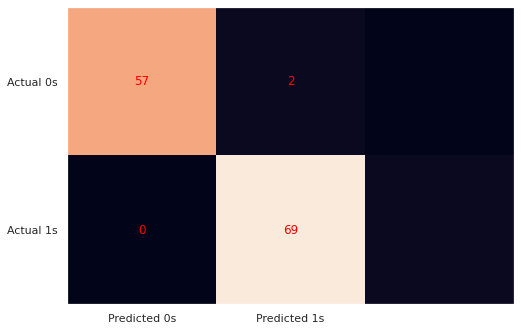

In [ ]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        59
           2       0.96      0.97      0.97        71
           3       0.96      0.98      0.97        48

    accuracy                           0.97       178
   macro avg       0.97      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178

